# Otimização

## Introdução

Problemas de otimização (POs) são encontrados em diversas situações da Engenharia, em particular na Engenharia de Produção. Em uma linha de produção, por exemplo, a otimização de custos com logística, recursos humanos, matéria-prima são exemplos de onde podemos empregar métodos computacionais para obter soluções _ótimas_. Entretanto, princípios de otimização são a base de muitos algoritmos e aplicações de inteligência artificial, em particular, no aprendizado de máquina. Máquinas de vetor de suporte (_support vector machines_) são um exemplo de onde se usa otimização, já que podem ser formuladas como problemas convexos quadráticos.

Problemas de otimização são comumente tratados como *problemas de minimização*, onde se busca o _mínimo global_ de uma _função objetivo_ (FO) escalar $f(x)$, visto que maximizar $f(x)$ é equivalente a minimizar $-f(x)$. 

Entretanto, esses problemas são acompanhados de _restrições_, que podem ser representadas por uma igualdade ou por uma desigualdade. Quando uma restrição é escrita na forma $g(x) = 0$, dizemos que $g(x)$ é uma _restrição de igualdade_; quando escrita na forma $h(x) \leq 0$, dizemos que $h(x)$ é uma _restrição de desigualdade_.

Neste capítulo, faremos uma breve explanação sobre otimização tomando o cálculo de derivadas e pontos críticos como elementos fundamentais. Utilizaremos recursos de computação simbólica para resolver um problema unidimensional e revisitaremos conceitos aprendidos nas disciplinas de Cálculo.

### Classificação de problemas de otimização

Problemas de otimização (PO) são classificados com base nas propriedades das funções $f(x)$, $g(x)$ e $h(x)$. Em linhas gerais, um PO pode ser:

- _univariado_ (ou _unidimensional_), se $x$ é escalar, i.e. $x \in \mathbb{R}$;
- _multivariado_ (ou _multidimensional_), se $x$ é um vetor, i.e. $x \in \mathbb{R}^n$.
- _linear_: se a FO e as restrições são funções lineares. Neste caso, por razões históricas, diz-se que o problema é de _programação linear_.
- _não-linear_: se a FO e as restrições são funções não-lineares. Neste caso, diz-se que o problema é de _programação não-linear_.

Com respeito às restrições, um PO pode ainda ser:

- _irrestrito_: quando não se assumem limites para os valores de $x$.
- _restrito_: quando limites para os valores de $x$ são impostos.

Aqui trataremos apenas de casos em que $x \in \mathbb{R}$.

### Problemas convexos

Sabe-se que problemas não-lineares são muito mais difíceis de resolver do que problemas lineares porque eles podem admitir uma ampla variedade de comportamentos. Um PO não-linear pode ter tanto _mínimos locais_ quanto _mínimos globais_. Logo, encontrar o _mínimo global_ de uma função $f(x)$ não-linear exige técnicas aperfeiçoadas. 

Neste sentido, uma subclasse de problemas não-lineares que pode ser resolvida eficientemente são os chamados _convexos_. Em problemas convexos, a função $f(x)$ é _convexa_. Mas o que é uma _função convexa_?

Uma função convexa definida em um intervalo $[a,b]$ é aquela em que todos os seus valores estão abaixo da reta secante que passa pelos pontos $(a,f(a))$ e $(b,f(b)$. Isto, por sua vez, garante que ela contenha _somente_ um mínimo global.

Importaremos os seguintes módulos:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
sy.init_printing()

**Exemplo**: a função $f(x) = 3x^2 - 0.36x - 11.2$ é convexa em $[-2,3]$.

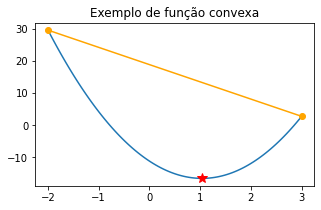

In [2]:
# domínio
a,b = -2,3
x = np.linspace(a,b,100) 

# função e valores nos extremos
f = lambda x: 5*x**2 - 10.36*x - 11.2 
fa,fb = f(a),f(b) 

# reta secante
s = fa + (fb - fa)/(b - a)*(x - a)

# ponto de mínimo: -b/(2a)
xmin = 10.36/10 

# plotagem de funções
plt.figure(figsize=(5,3))
plt.plot(x,f(x))
plt.plot(x,s,color='#ffa500')

# pontos da secante
plt.plot(a,f(a),'o',color='#ffa500')
plt.plot(b,f(b),'o',color='#ffa500')

# ponto de mínimo
plt.plot(xmin,f(xmin),'*r',ms=10);

plt.title('Exemplo de função convexa'); 

**Exemplo**: a função $p(x) = 10x^2\textrm{sen}(6x) - 10.36\exp(x/8) - 11.2$ não é convexa em $[-2,3]$.

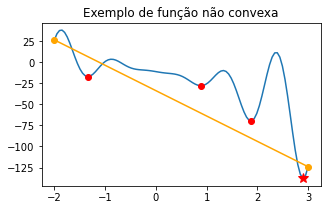

In [3]:
# função
p = lambda x: 10*x**2*np.sin(6*x) - 10.36*x*np.exp(x/8) - 11.2 

# extremos
pa,pb = p(a),p(b)

# secante
t = pa + (pb - pa)/(b - a)*(x - a) 

# plotagem de funções
plt.figure(figsize=(5,3))
plt.plot(x,p(x))
plt.plot(x,t,color='#ffa500')

# pontos da secante
plt.plot(a,p(a),'o',color='#ffa500')
plt.plot(b,p(b),'o',color='#ffa500')

# mínimos locais
xloc = [-1.33868618,0.88811853,1.87451904]

for xl in xloc:
    plt.plot(xl,p(xl),'or');

# mínimo global
xmin2 = 2.90547127

plt.plot(xmin2,p(xmin2),'*r',ms=10);

plt.title('Exemplo de função não convexa'); 

Como vemos acima, a função $p(x)$ admite 3 mínimos locais e um mínimo global. Pense um pouco sobre que estratégia computacional você utilizaria para encontrar os mínimos locais. Mais adiante mostraremos como localizar o mínimo global para funções univariadas contínuas (quando possível).

### Pontos de sela

Como vimos acima, a convexidade de uma função é uma propriedade muito importante para que um mínimo global seja localizado. Como sabemos do Cálculo, pontos de máximo ou mínimo identificam-se como _pontos críticos_ de uma função nos quais a primeira derivada da função se anula.

Casos particulares onde a derivada de uma FO anula-se mas o ponto não pode ser definido como de mínimo ou máximo podem ocorrer. Tais situações implicam a existência dos chamados _pontos de sela_. Uma função com um único ponto de sela, por exemplo, não admitirá mínimo global nem mínimo local. Para testarmos se um ponto crítico é um ponto de sela, devemos verificar o sinal da segunda derivada da função. Uma das seguintes situações deve ser obtida em um ponto crítico $x^*$:

- _ponto de mínimo:_ $f''(x^*) > 0$
- _ponto de máximo:_ $f''(x^*) < 0$
- _ponto de sela:_ $f''(x^*) = 0$

**Exemplo:** qualquer função quadrática admite ou um ponto de mínimo ou de máximo. A função $f(x) = x^3$ possui um ponto de sela em $x^* = 0$.

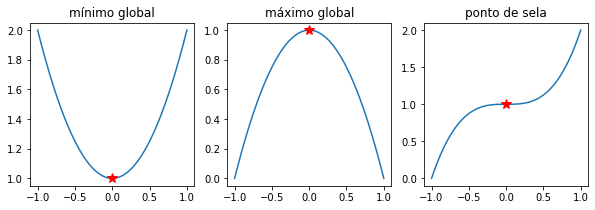

In [4]:
x = np.linspace(-1,1)

plt.figure(figsize=(10,3))

plt.subplot(131)
plt.plot(x,x**2 + 1)
plt.plot(0,1,'r*',ms=10)
plt.title('mínimo global')

plt.subplot(132)
plt.plot(x,-x**2 + 1)
plt.plot(0,1,'r*',ms=10)
plt.title('máximo global')

plt.subplot(133)
plt.plot(x,x**3 + 1)
plt.plot(0,1,'r*',ms=10)
plt.title('ponto de sela');

## Otimização univariada

Como dissemos anteriormente, a otimização univariada visa resolver um problema de minimização tomando uma FO que depende apenas de uma variável. Matematicamente, podemos descrever este problema da seguinte forma:

$$\text{Encontre } x^{*} = \min f(x), \, \text{sujeito a} \, g(x) = 0, h(x) \leq 0.$$

Em geral, $x$ é uma _variável de decisão_, isto é, uma quantidade que pode ser ajustada livremente (ex. comprimentos, áreas, ângulos etc.). 

As técnicas utilizadas para a resolução de um problema desse tipo são baseadas em métodos analíticos (busca pelos zeros das derivadas) ou em métodos computacionais (determinação de raízes por processos iterativos). Métodos chamados de _root finding_ são estudados em um curso introdutório de Métodos Numéricos.

Para exemplificar, usaremos uma abordagem analítica por meio de computação simbólica (módulo `sympy`) para resolver um problema que pode ser exibido como de otimização univariada.

### Problema resolvido

Consideremos o seguinte problema: _maximizar a área do retângulo inscrito em uma elipse._

### Resolução 

Em primeiro lugar, escreveremos este problema em linguagem matemática. Sabemos que a área de um retângulo com vértice esquerdo inferior na origem da elipse e com vértice direito superior no ponto $(x,y)$ da elipse que está no primeiro quadrante é dada por $A_r = xy$. Logo, a área do retângulo inscrito na elipse será $A = 4xy$.

A área $A$ pode ser escrita em termos de $y$. Uma vez que a equação da elipse (centrada na origem) é dada por

$$\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1,$$

podemos resolver a equação da elipse para $x$ (ou $y$) e substituir esta solução na expressão da área para ter uma função $A(x)$ (ou $A(y)$). Se escolhermos $x$, o problema de otimização pode ser escrito como:

$$\text{Encontre } x^{*} = \min \,( -A(x) ), \, \text{sujeito a} \, x > 0.$$

Notemos que maximizar $A(x)$ equivale a minimizar $-A(x)$. 

Na busca do ponto de mínimo $x^{*}$, usaremos computação simbólica.

Primeiramente, criamos variáveis simbólicas que representem as variáveis de interesse do problema e a expressão da área total.

In [5]:
# cria variáveis simbólicas
x,y,a,b = sy.symbols('x,y,a,b') 

# área do retângulo no 1o. quadrante é xy
# logo, área total é 4xy
A = -4*x*y
A

Em seguida, resolvemos a equação da elipse para a variável $y$ utilizando a função `sympy.solve`.

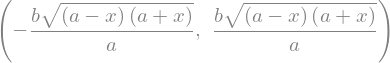

In [6]:
# resolve equação da elipse para y
sol = sy.solve(x**2/a**2 + y**2/b**2 - 1,y)
sol[0],sol[1]

Duas soluções são possíveis para $y$. Porém, como o nosso ponto de referência sobre a elipse está no primeiro quadrante, tomamos a expressão para $y > 0$ e a substituímos na expressão da área de forma a obter uma expressão univariada $A(x)$.

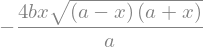

In [7]:
# substitui expressão de y positivo em A para ter -A(x)
A = A.subs({'y':sol[1]})
A

Localizaremos o ponto crítico da função a partir da derivada $A'(x)$. Derivando $A$ em relação a $x$, obtemos: 

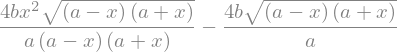

In [8]:
# deriva -A(x) com a,b constantes
dAdx = A.diff(x)
dAdx

Em seguida, buscamos $x^{*}$ tal que $A'(x^{*}) = \frac{dA}{dx}(x^{*}) = 0$.

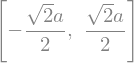

In [9]:
# resolve A'(x*) = 0
sol_x = sy.solve(dAdx,x)
sol_x

Duas soluções, são possíveis, porém, podemos verificar qual ponto de crítico, de fato, é o que minimizará $-A(x)$ através da análise da concavidade. Então, calculamos $A''(x)$, para cada ponto crítico.

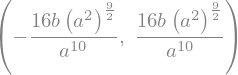

In [10]:
# testa A''(x) para os dois pontos
dAdx2 = dAdx.diff(x)
dAdx2.subs(x,sol_x[0]).simplify(),dAdx2.subs(x,sol_x[1]).simplify()

Uma vez que a segunda solução verifica a concavidade positiva, temos que o ponto crítico $x^{*}$ é:

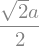

In [11]:
# concavidade para cima => ponto de mínimo
xs = sol_x[1]
xs

Usando este valor na equação da elipse, obtemos a ordenada correspondente:

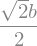

In [12]:
# resolve para y > 0
ys = sy.solve(xs**2/a**2 + y**2/b**2 - 1,y)[1]
ys

Por fim, substituindo $x^{*}$ na expressão da área, temos que $A_{max}$ é:

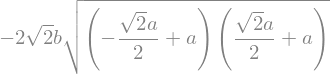

In [13]:
# área máxima
A_max = A.subs(x,xs)
A_max

ou, de forma, simplificada,

In [14]:
# simplificando
A_max.simplify()

### Conclusão 

A área do retângulo inscrito na elipse será máxima quando $x = \frac{\sqrt{2}}{2}a$ e $y = \frac{\sqrt{2}}{2}b$. Portanto, $A_{max} = 2ab$, para comprimentos $a$ e $b$ de semi-eixo maior e menor.

## Estudo paramétrico de geometria

No gráfico abaixo, plotamos a variação das áreas de retângulos inscritos em uma elipse arbitrária com semi-eixos $a$ e $b$ em função do comprimento $x$ da meia-base do retângulo até o limite da meia-base do retângulo de área máxima. Adicionalmente, plotamos a variação do comprimento da diagonal do retângulo. A constante $A_{elip}$ é a área da elipse.

Você pode alterar os parâmetros de construção de elipse, o número de valores para $x$ e realizar uma nova análise dos parâmetros.

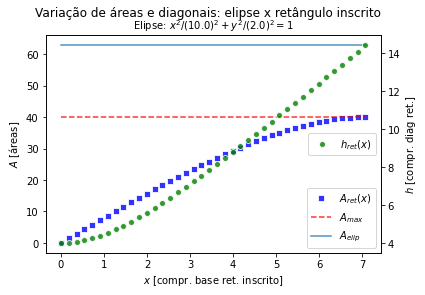

In [15]:
# semi-eixos da elipse
a,b = 10,2

# no. de retângulos inscritos
nx = 40 

# base variável do retângulo
X = np.linspace(0,np.sqrt(2)/2*a,nx)

# área da elipse
e = np.pi*a*b

# áreas dos retângulos
R = []
H = []
for x in X:
    y = b*np.sqrt(1 - x**2/a**2)        
    r = 4*x*y
    h = np.hypot(2*x,2*y) # diagonal do retângulo    
    R.append(r)
    H.append(h)
    
# plotagem   
fig,ax1 = plt.subplots(figsize=(6,4))
ax1.plot(X,R,'sb',mec='w',alpha=0.8,label='$A_{ret}(x)$')
ax1.plot(X,np.full(X.shape,2*a*b),'--r',alpha=0.8,label='$A_{max}$')
ax1.plot(X,np.full(X.shape,e),'-',alpha=0.8,label='$A_{elip}$')
ax1.legend(fontsize=10)
# labels
plt.xlabel('$x$ [compr. base ret. inscrito]')
plt.ylabel('$A$ [áreas]');

ax2 = ax1.twinx()
ax2.plot(X,H,'og',mec='w',alpha=0.8,label='$h_{ret}(x)$')
ax2.legend(loc=5,ncol=1,fontsize=10)
plt.ylabel('$h$ [compr. diag ret.]');

plt.suptitle('Variação de áreas e diagonais: elipse x retângulo inscrito\n');
plt.title(f'Elipse: $x^2/({a:.1f})^2 + y^2/({b:.1f})^2 = 1$',fontsize=10);